# Trabalho
- Cálculo dos coeficientes
- Ajuste da reta
  - à mão
  - lm()
- Disperção dos dados
- Disperção dos erros
- Plot do modelo
- Teste de Breusch-Pagan
  - lib lmtest, função bptest()

# Libs e dados

In [ ]:
install.packages("corrplot")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’




In [ ]:
library('readr')
library('dplyr')
library('corrplot')
library('lmtest')

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
data <- read.csv("/content/forestfires.csv")
head(data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0
2,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0
3,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0
4,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0
5,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0
6,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0


In [ ]:
  summary(data)

       X               Y          month               day           
 Min.   :1.000   Min.   :2.0   Length:517         Length:517        
 1st Qu.:3.000   1st Qu.:4.0   Class :character   Class :character  
 Median :4.000   Median :4.0   Mode  :character   Mode  :character  
 Mean   :4.669   Mean   :4.3                                        
 3rd Qu.:7.000   3rd Qu.:5.0                                        
 Max.   :9.000   Max.   :9.0                                        
      FFMC            DMC              DC             ISI        
 Min.   :18.70   Min.   :  1.1   Min.   :  7.9   Min.   : 0.000  
 1st Qu.:90.20   1st Qu.: 68.6   1st Qu.:437.7   1st Qu.: 6.500  
 Median :91.60   Median :108.3   Median :664.2   Median : 8.400  
 Mean   :90.64   Mean   :110.9   Mean   :547.9   Mean   : 9.022  
 3rd Qu.:92.90   3rd Qu.:142.4   3rd Qu.:713.9   3rd Qu.:10.800  
 Max.   :96.20   Max.   :291.3   Max.   :860.6   Max.   :56.100  
      temp             RH              wind            

# Regressão Linear
1. calcular o coeficiente de correlação
2. calcular reta
    - β1 = (∑xᵢyᵢ - ∑xᵢ∑yᵢ) / ∑xᵢ² - (∑xᵢ)²

      ou:  ∑((xᵢyᵢ - n(xᵢyᵢ) / (n-1)var(x)))

    - β0 = ̄y - βx̄
    - yi = β0i + β1xi
3. ajustar reta minimizando função de erro utilizada (neste caso, a distância euclidiana)
4. testar a hipótese de independência das variáveis para adotar um modelo


# Cálculo da Reta

In [ ]:
# função para calcular o coficiente angular

angular <- function(x, y) {

  # variaveis
  n <- length(x)
  xiyi <- sum(x * y)
  x_media <- mean(x)
  y_media <- mean(y)
  x_var <- var(x)

  # formula
  numerador <- xiyi - (n * x_media * y_media)
  divisor <- (n-1) * x_var

  angular <- numerador / divisor

  return(angular)
}

In [ ]:
# função para calcular o intercepto

intercepto <- function(x, y, beta_1) {

  # variaveis
  y_media <- mean(y)
  x_media <- mean(x)

  # formula
  intercepto <- y_media - (beta_1 * x_media)

  return(intercepto)
}

In [ ]:
# função para calcular a reta

reta <- function(angular, intercepto, x) {
  return(angular + (intercepto * x))
}

# Teste

In [ ]:
# randomicos da distribuição normal para teste

x <- rnorm(2000, mean = 0, sd = 3)
y <- rnorm(2000, mean = 0, sd = 3)

In [ ]:
b1 <- angular(x, y)
b0 <- intercepto(x, y, b1)

aqui, os coeficientes calculados pelas funções devem ser iguais aos coeficientes da função lm().

In [ ]:
lm(y~x, data.frame(x,y))


Call:
lm(formula = y ~ x, data = data.frame(x, y))

Coefficients:
(Intercept)            x  
  -0.017484    -0.003221  


In [ ]:
print(paste("b0:", b0, "b1:", b1))

[1] "b0: -0.0174840103550686 b1: -0.00322060644479855"


# Correlação de Pearson

In [ ]:
# data split

num <- select_if(data, is.numeric)
x <- num[, -which(names(num) == 'area')]

In [ ]:
# matriz de correlação

matriz_cor <- cor(x)
matriz_cor

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000000,0.539548171,-0.02103927,-0.048384178,-0.08591612,0.006209941,-0.05125826,0.08522319,0.01879782,0.065387168,0.063385299
Y,0.539548171,1.000000000,-0.04630755,0.007781561,-0.10117777,-0.024487992,-0.02410308,0.06222073,-0.02034085,0.033234103,0.044873225
FFMC,-0.021039272,-0.046307546,1.00000000,0.382618800,0.33051180,0.531804931,0.43153226,-0.30099542,-0.02848481,0.056701533,0.040122004
DMC,-0.048384178,0.007781561,0.38261880,1.000000000,0.68219161,0.305127835,0.46959384,0.07379494,-0.10534225,0.074789982,0.072994296
DC,-0.085916123,-0.101177767,0.33051180,0.682191612,1.00000000,0.229154169,0.49620805,-0.03919165,-0.20346569,0.035860862,0.049383225
ISI,0.006209941,-0.024487992,0.53180493,0.305127835,0.22915417,1.000000000,0.39428710,-0.13251718,0.10682589,0.067668190,0.008257688
temp,-0.051258262,-0.024103084,0.43153226,0.469593844,0.49620805,0.394287104,1.00000000,-0.52739034,-0.22711622,0.069490547,0.097844107
RH,0.085223194,0.062220731,-0.30099542,0.073794941,-0.03919165,-0.132517177,-0.52739034,1.00000000,0.06941007,0.099751223,-0.075518563
wind,0.018797818,-0.020340852,-0.02848481,-0.105342253,-0.20346569,0.106825888,-0.22711622,0.06941007,1.00000000,0.061118880,0.012317277
rain,0.065387168,0.033234103,0.05670153,0.074789982,0.03586086,0.067668190,0.06949055,0.09975122,0.06111888,1.000000000,-0.007365729


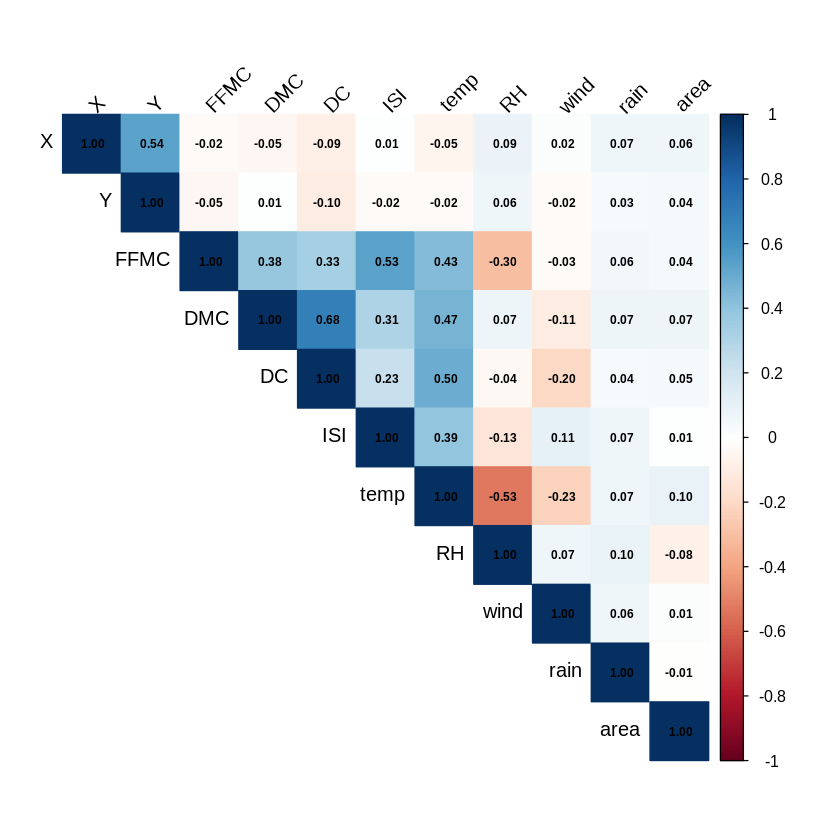

In [ ]:
# visualização da matriz de correlação

corrplot(matriz_cor,
         method = "color",
         type = "upper",
         tl.col = "black",
         tl.srt = 45,
         addCoef.col = "black",
         number.cex = 0.6)

com a matriz de correlação, vamos que todas as variáveis tem baixas correlações com a target

# Dispersão dos Dados

In [ ]:
attach(x)

The following objects are masked from x (pos = 3):

    area, DC, DMC, FFMC, ISI, rain, RH, temp, wind, X, Y


The following objects are masked from x (pos = 4):

    DC, DMC, FFMC, ISI, rain, RH, temp, wind, X, Y


The following objects are masked from num (pos = 5):

    area, DC, DMC, FFMC, ISI, rain, RH, temp, wind, X, Y


The following objects are masked from num (pos = 6):

    area, DC, DMC, FFMC, ISI, rain, RH, temp, wind, X, Y




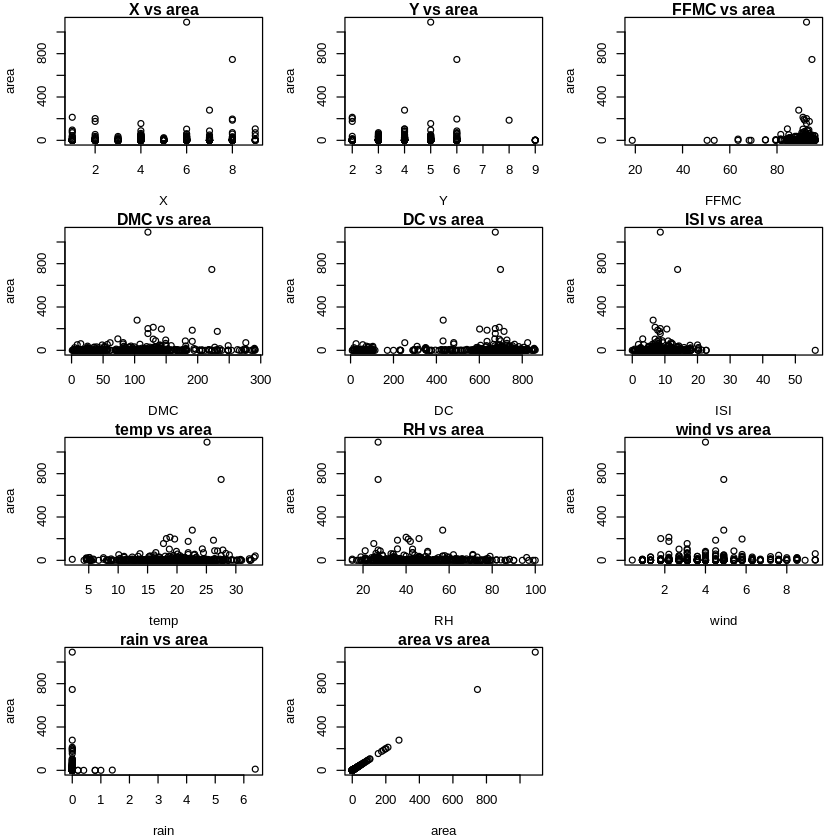

In [ ]:
# plots de cada variável em relação da target

N <- length(names(num))
rows <- ceiling(sqrt(N))
cols <- ceiling(N / rows)
par(mfrow = c(rows, cols), mar = c(4, 4, 1, 1) + 0.1)

for (var in names(num)) {
  plot(
    x = num[[var]],
    y = area,
    xlab = var,
    ylab = "area",
    main = paste(var, "vs area")
  )
}

# Ajuste aos dados

In [ ]:
# formula multivariavel

formula <- as.formula(paste("area ~", paste(names(input), collapse = " + ")))

In [ ]:
# modelo ajustado

model <- lm(formula, x)
model


Call:
lm(formula = formula, data = x)

Coefficients:
(Intercept)            X            Y         FFMC          DMC           DC  
  -6.369315     1.907945     0.569181    -0.039200     0.077335    -0.003295  
        ISI         temp           RH         wind         rain  
  -0.713739     0.800213    -0.230645     1.557431    -3.404037  


Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


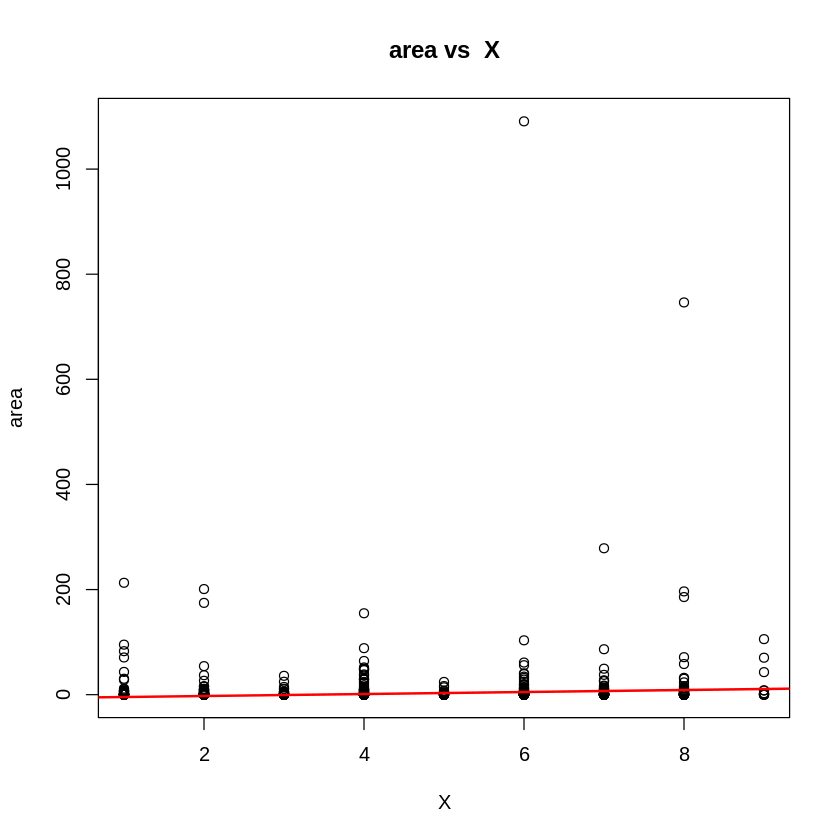

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


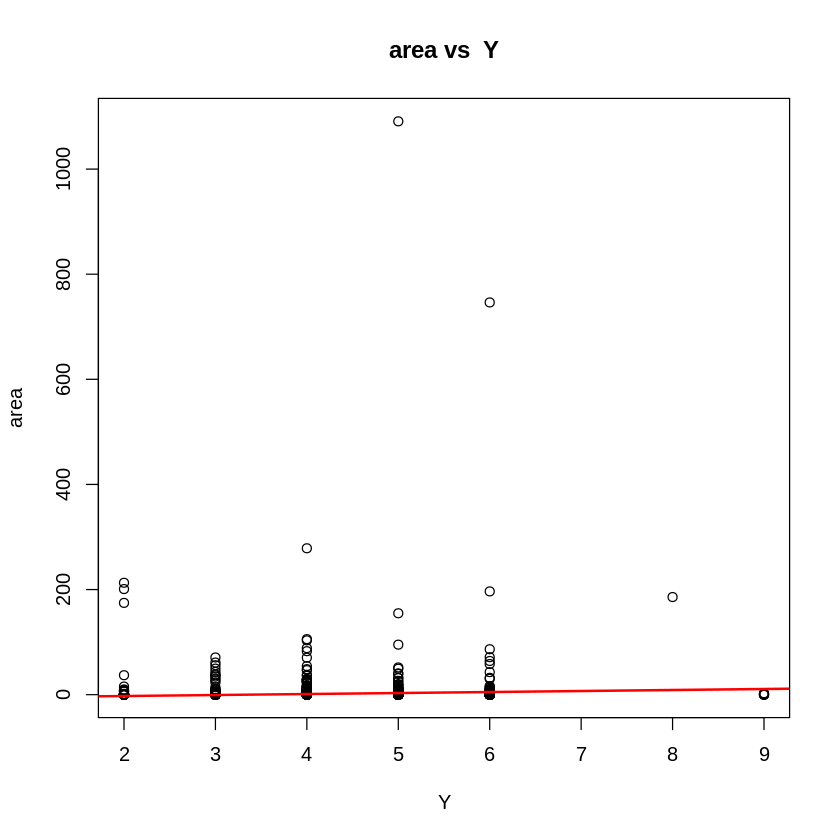

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


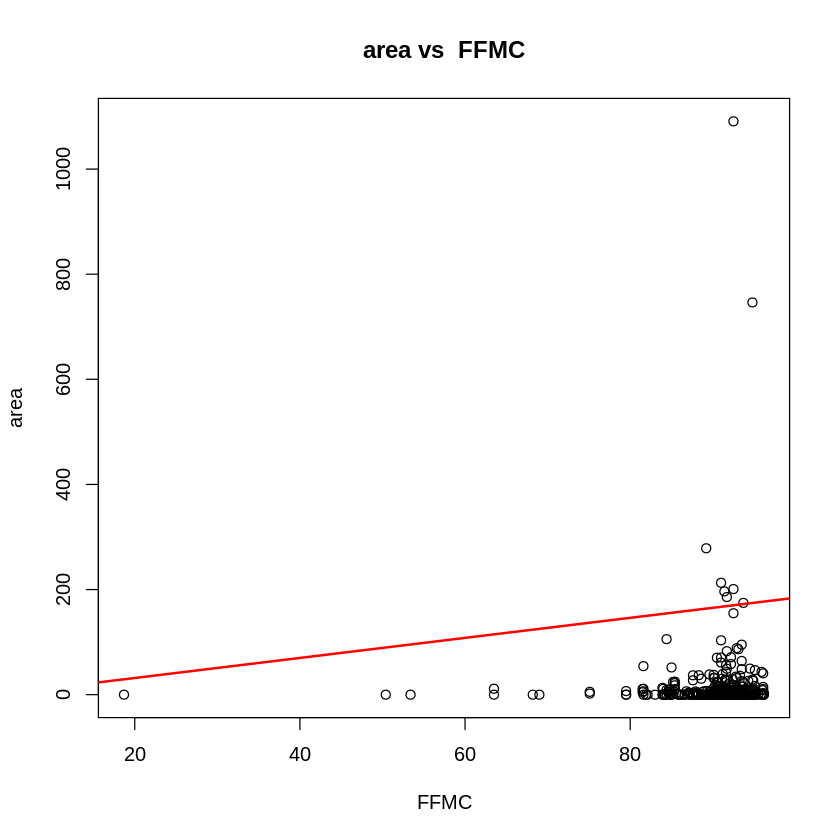

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


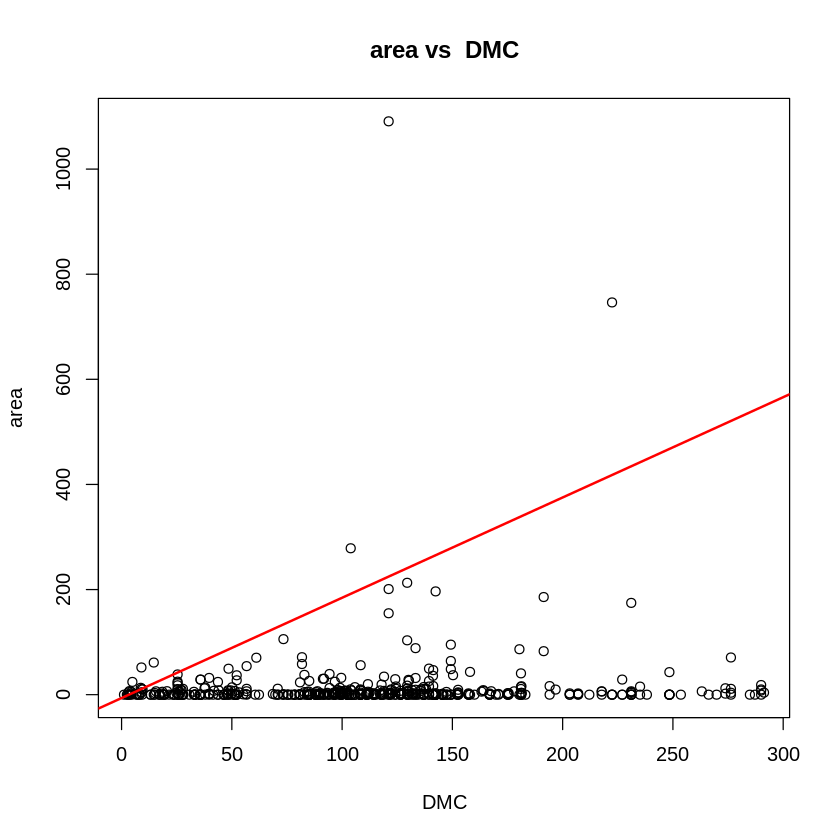

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


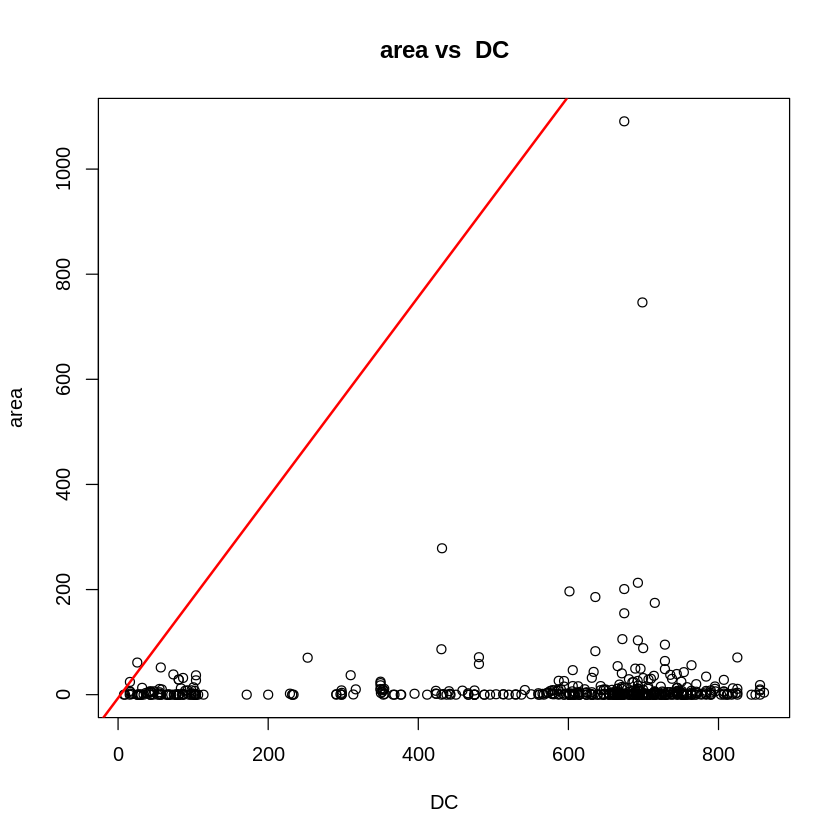

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


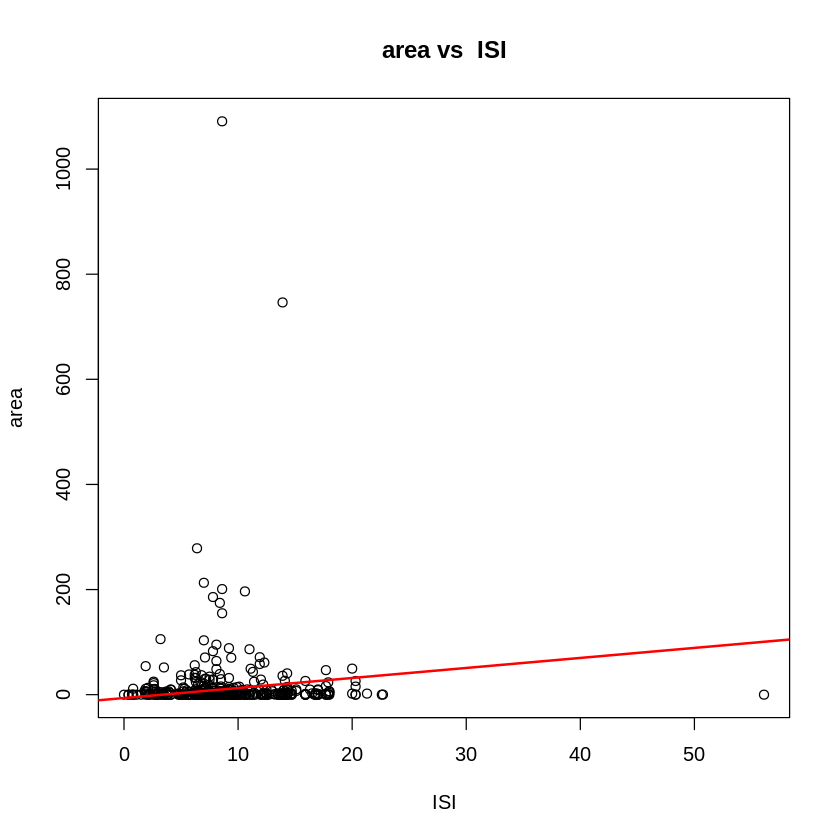

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


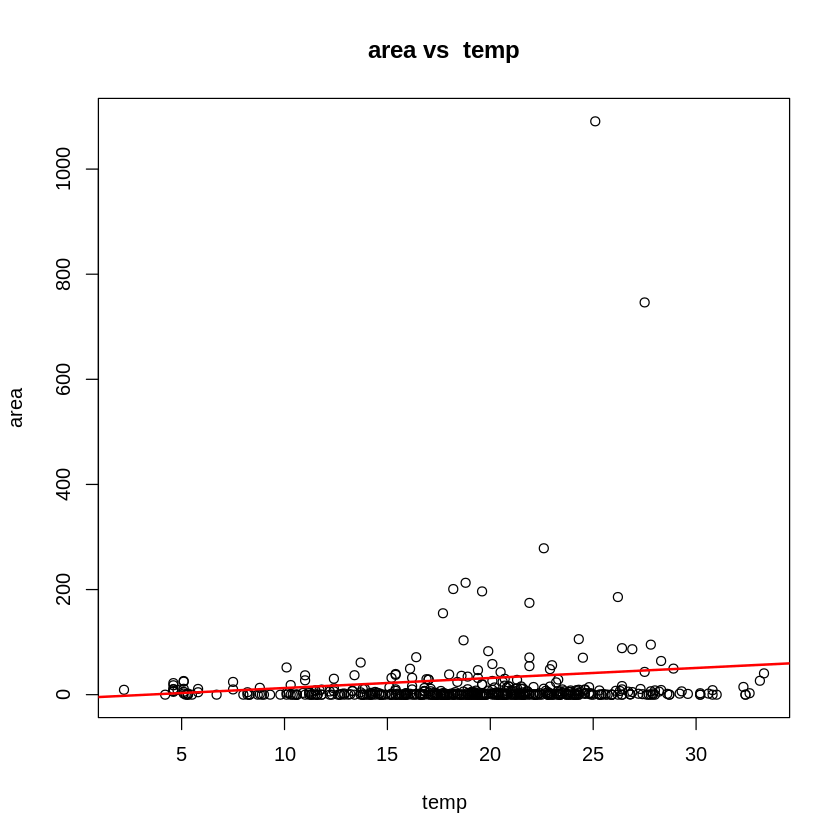

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


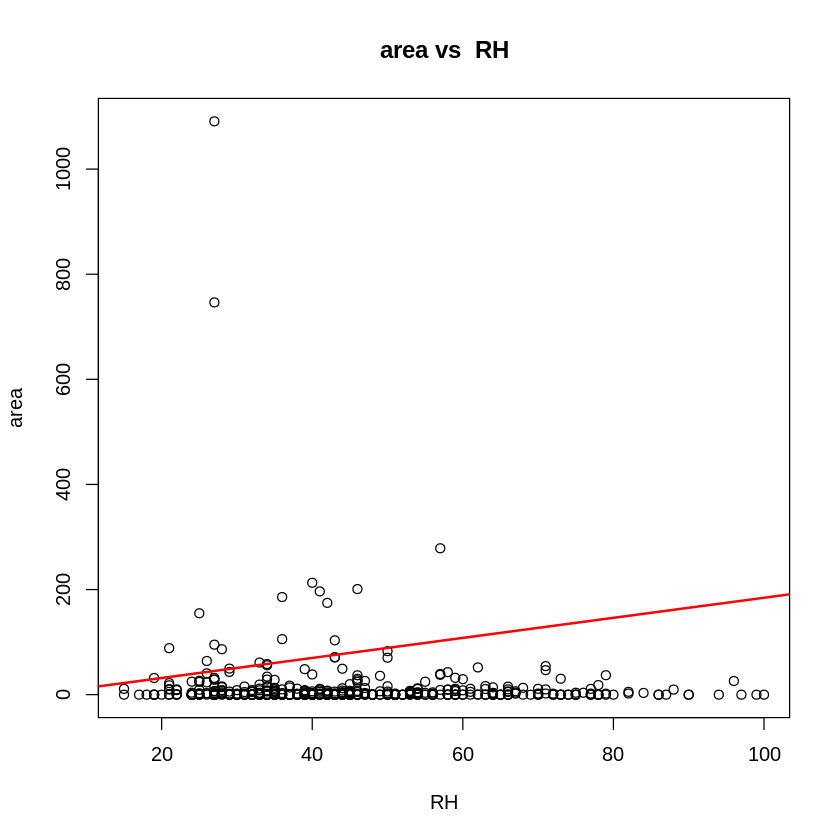

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


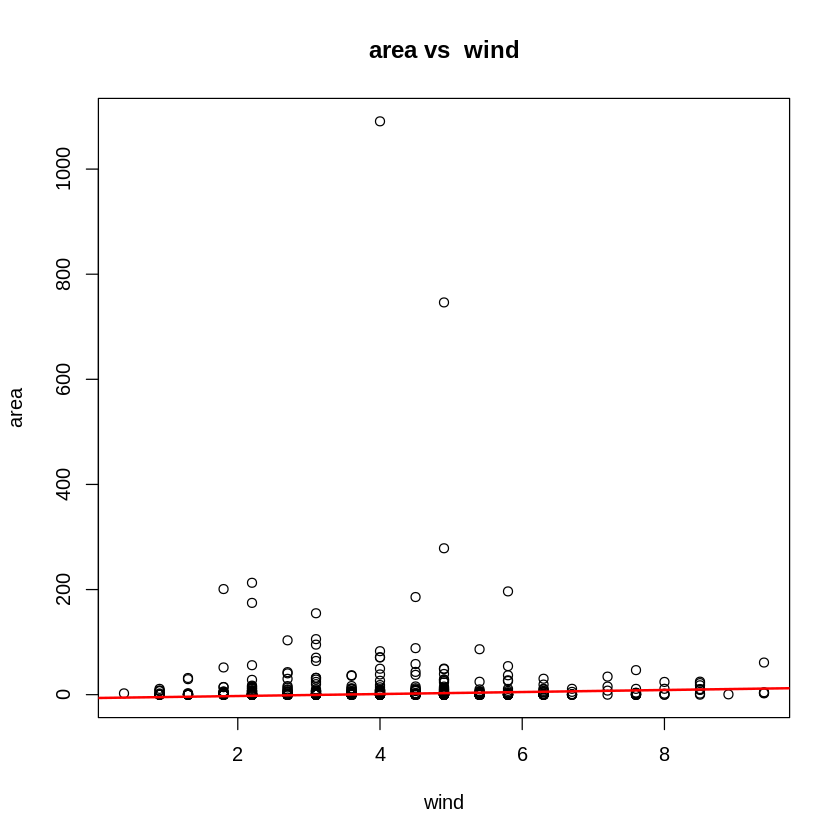

Warning message in abline(model, col = "red", lwd = 2):
“only using the first two of 11 regression coefficients”


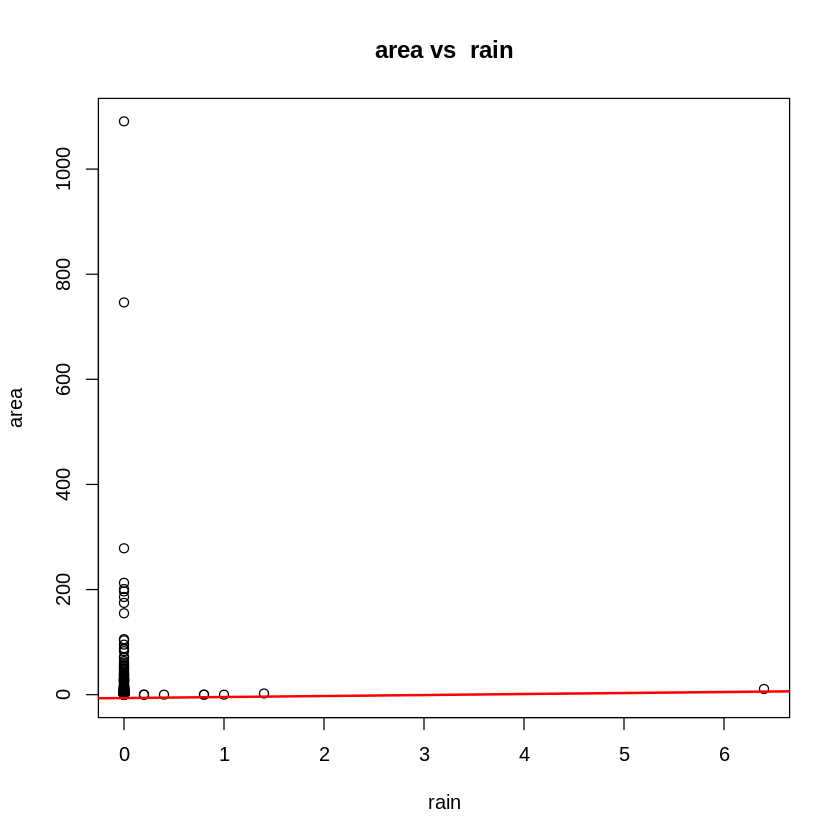

In [ ]:
# plot das retas por variavei em relação à target

for (var in names(input)) {

  plot(
    x = num[[var]],
    y = area,
    xlab = var,
    ylab = "area",
    main = paste("area vs ", var)
    )

   abline(model, col = "red", lwd = 2)

}

# Teste de Breusch-Pagan

In [ ]:
bptest(model)


	studentized Breusch-Pagan test

data:  model
BP = 6.1157, df = 10, p-value = 0.8054
